Imports needed for modeling and analysis

In [155]:
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.metrics import  confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Imports dataframes and checks for correction

In [14]:
df_no_feature_engineering=pd.read_csv('../Data/movies_data_for_modeling.csv',index_col='Unnamed: 0')
df_with_feature_engineering=pd.read_csv('../Data/movies_df_with_new_features.csv',index_col='Unnamed: 0')

In [16]:
print(df_no_feature_engineering.shape)
df_no_feature_engineering.head()

(44686, 131)


,id,popularity,runtime,video,vote_average,vote_count,release_year,release_month,release_day,has_homepage,...,total_movie_crew,number_of_A_list_crew_members_per_movie,number_of_B_list_crew_members_per_movie,number_of_C_list_crew_members_per_movie,number_of_D_list_crew_members_per_movie,total_cast_per_movie,number_of_A_list_cast_members_per_movie,number_of_B_list_cast_members_per_movie,number_of_C_list_cast_members_per_movie,number_of_D_list_cast_members_per_movie
0,862,21.946943,81.0,0,7.7,5415.0,1995,10,30,1,...,106.0,22.0,28.0,39.0,24.0,13.0,9.0,2.0,2.0,0.0
1,8844,17.015539,104.0,0,6.9,2413.0,1995,12,15,0,...,16.0,10.0,5.0,3.0,0.0,26.0,6.0,6.0,5.0,9.0
2,15602,11.712900,101.0,0,6.5,92.0,1995,12,22,0,...,4.0,3.0,2.0,0.0,0.0,7.0,7.0,0.0,0.0,0.0
3,31357,3.859495,127.0,0,6.1,34.0,1995,12,22,0,...,10.0,3.0,5.0,3.0,2.0,10.0,7.0,3.0,1.0,0.0
4,11862,8.387519,106.0,0,5.7,173.0,1995,2,10,0,...,7.0,6.0,1.0,0.0,0.0,12.0,9.0,3.0,0.0,0.0


In [17]:
print(df_with_feature_engineering.shape)
df_with_feature_engineering.head()

(44686, 218)


,vote_average,vote_count,release_year,release_month,release_day,overview_negative_sentiment_score,overview_neutral_sentiment_score,overview_positive_sentiment_score,overview_compound_sentiment_score,overview_length,...,produced_in_france,produced_in_usa,produced_in_japan,produced_in_sweden,produced_in_italy,produced_in_germany,video,title_change,id,popularity
0,7.7,5415.0,1995,10,30,0.048,0.886,0.066,0.2500,303.0,...,0,1,0,0,0,0,0,0,862,21.946943
1,6.9,2413.0,1995,12,15,0.161,0.702,0.137,-0.4588,395.0,...,0,1,0,0,0,0,0,0,8844,17.015539
2,6.5,92.0,1995,12,22,0.168,0.791,0.041,-0.7645,327.0,...,0,1,0,0,0,0,0,0,15602,11.712900
3,6.1,34.0,1995,12,22,0.060,0.673,0.267,0.8860,270.0,...,0,1,0,0,0,0,0,0,31357,3.859495
4,5.7,173.0,1995,2,10,0.000,0.944,0.056,0.5023,318.0,...,0,1,0,0,0,0,0,0,11862,8.387519


Creation of the popularity class integers and allow four popularity classes resulting in a ranking of one to four.

In [36]:
df_no_feature_engineering['popularity_class']=df_no_feature_engineering['popularity'].astype(int)
df_with_feature_engineering['popularity_class']=df_with_feature_engineering['popularity'].astype(int)
print(list(df_no_feature_engineering['popularity_class'].value_counts()))
dict(df_no_feature_engineering['popularity_class'].value_counts())

[20610, 7773, 3492, 2034, 1653, 1566, 1438, 1259, 993, 856, 695, 609, 442, 305, 253, 144, 111, 71, 62, 55, 36, 24, 19, 16, 15, 11, 10, 10, 10, 10, 7, 7, 7, 7, 7, 6, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


{0: 20610,
 1: 7773,
 2: 3492,
 3: 2034,
 4: 1653,
 5: 1566,
 6: 1438,
 7: 1259,
 8: 993,
 9: 856,
 10: 695,
 11: 609,
 12: 442,
 13: 305,
 14: 253,
 15: 144,
 16: 111,
 17: 71,
 18: 62,
 19: 55,
 20: 36,
 21: 24,
 23: 19,
 24: 16,
 22: 15,
 26: 11,
 29: 10,
 36: 10,
 25: 10,
 31: 10,
 28: 7,
 34: 7,
 30: 7,
 33: 7,
 27: 7,
 41: 6,
 32: 4,
 35: 3,
 42: 3,
 39: 3,
 37: 3,
 38: 2,
 88: 2,
 185: 2,
 48: 2,
 47: 2,
 50: 2,
 228: 1,
 68: 1,
 60: 1,
 547: 1,
 133: 1,
 67: 1,
 187: 1,
 96: 1,
 64: 1,
 294: 1,
 123: 1,
 75: 1,
 59: 1,
 49: 1,
 183: 1,
 54: 1,
 213: 1,
 53: 1,
 52: 1,
 147: 1,
 51: 1,
 146: 1,
 145: 1,
 78: 1,
 40: 1,
 63: 1,
 45: 1,
 89: 1,
 140: 1,
 76: 1,
 44: 1,
 43: 1,
 154: 1,
 72: 1,
 287: 1}

Creation of the function that will create the popularity class.

In [44]:
def popularity_class_label_func (integer):
    if integer==0:
        i=1
    elif integer in range (1,6,1):
        i=2
    elif integer in range (6,11,1):
        i=3
    else: i=4
    return i

Apply the function to create a new y for classification modeling.

In [45]:
df_no_feature_engineering['popularity_class_label']=df_no_feature_engineering['popularity_class'].apply(popularity_class_label_func)
df_no_feature_engineering[['popularity_class','popularity_class_label']].sample(20)

,popularity_class,popularity_class_label
3352,3,2
34327,1,2
24806,3,2
1321,5,2
42436,1,2
10333,4,2
42684,0,1
38097,0,1
42171,5,2
42696,1,2


In [48]:
df_with_feature_engineering['popularity_class_label']=df_with_feature_engineering['popularity_class'].apply(popularity_class_label_func)
df_with_feature_engineering[['popularity_class','popularity_class_label']].sample(20)

,popularity_class,popularity_class_label
20945,0,1
7869,5,2
6146,6,3
14377,1,2
29391,0,1
35612,2,2
16486,0,1
16217,1,2
17340,0,1
36095,0,1


Create the two X and y variables that will have the dataframes with or without intial feature generation.

In [51]:
X_no_features=df_no_feature_engineering.drop(columns=['id','popularity','popularity_class','popularity_class_label'])
y_no_features=df_no_feature_engineering['popularity_class_label']
X_features=df_with_feature_engineering.drop(columns=['id','popularity','popularity_class','popularity_class_label'])
y_features=df_with_feature_engineering['popularity_class_label']

Creating a train test split for the X and y to be modeled.

In [54]:
X_train_no_features, X_test_no_features, y_train_no_features,y_test_no_features=train_test_split(X_no_features,y_no_features,stratify=y_no_features,random_state=200)

X_train_features, X_test_features, y_train_features,y_test_features=train_test_split(X_features,y_features,stratify=y_features,random_state=200)

Scaling the data to have more effective modeling.

In [56]:
ss=StandardScaler()
X_train_no_features_sc=ss.fit_transform(X_train_no_features)
X_test_no_features_sc=ss.transform(X_test_no_features)
X_train_features_sc=ss.fit_transform(X_train_features)
X_test_features_sc=ss.transform(X_test_features)

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Logistic Regression were fit and show a 75% accuracy rating with no improvement with feature engineering. See below for details.

In [79]:
log_muli_class=LogisticRegressionCV(multi_class='multinomial')
log_muli_class.fit(X_train_no_features_sc,y_train_no_features)
(log_muli_class.score(X_train_no_features_sc,y_train_no_features),log_muli_class.score(X_test_no_features_sc,y_test_no_features))

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages

(0.7578623858685922, 0.7576083064804869)

In [58]:
log_muli_class.fit(X_train_features_sc,y_train_features)
(log_muli_class.score(X_train_features_sc,y_train_features),log_muli_class.score(X_test_features_sc,y_test_features))

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages

(0.7641284239422331, 0.7596670247046187)

Decision Trees were fit and while they trained better that tested worse than logistic regression.

In [59]:
dt_multi_class=DecisionTreeClassifier()
dt_multi_class.fit(X_train_no_features_sc,y_train_no_features)
(dt_multi_class.score(X_train_no_features_sc,y_train_no_features),dt_multi_class.score(X_test_no_features_sc,y_test_no_features))


(0.9999701617234589, 0.6867167919799498)

In [60]:
dt_multi_class.fit(X_train_features_sc,y_train_features)
(dt_multi_class.score(X_train_features_sc,y_train_features),dt_multi_class.score(X_test_features_sc,y_test_features))

(0.9999701617234589, 0.6860902255639098)

KNN models were fit and did not perfrom well in training and testing.

In [61]:
knn_multi_class=KNeighborsClassifier()
knn_multi_class.fit(X_train_no_features_sc,y_train_no_features)
(knn_multi_class.score(X_train_no_features_sc,y_train_no_features),knn_multi_class.score(X_test_no_features_sc,y_test_no_features))

(0.6922181774780689, 0.5681167203723595)

In [62]:
knn_multi_class.fit(X_train_features_sc,y_train_features)
(knn_multi_class.score(X_train_features_sc,y_train_features),knn_multi_class.score(X_test_features_sc,y_test_features))


(0.6942173420063257, 0.5724131757966344)

Gaussian Naive Bayes models were fit and did not perfrom well in training and testing.

In [67]:
gaussiannb_multi_class=GaussianNB()
gaussiannb_multi_class.fit(X_train_no_features_sc,y_train_no_features)
(gaussiannb_multi_class.score(X_train_no_features_sc,y_train_no_features),gaussiannb_multi_class.score(X_test_no_features_sc,y_test_no_features))

(0.4669690278689503, 0.4630325814536341)

In [68]:
gaussiannb_multi_class.fit(X_train_features_sc,y_train_features)
(gaussiannb_multi_class.score(X_train_features_sc,y_train_no_features),gaussiannb_multi_class.score(X_test_features_sc,y_test_no_features))

(0.5289431282449125, 0.5211242391693519)

Ridge Logistic Classifiers models were fit and did not perfrom well in training and testing.

In [70]:
ridge_multi_class=RidgeClassifierCV()
ridge_multi_class.fit(X_train_no_features_sc,y_train_no_features)
(ridge_multi_class.score(X_train_no_features_sc,y_train_no_features),ridge_multi_class.score(X_test_no_features_sc,y_test_no_features))


(0.6318851823118696, 0.630594343000358)

In [71]:
ridge_multi_class=RidgeClassifierCV()
ridge_multi_class.fit(X_train_features_sc,y_train_features)
(ridge_multi_class.score(X_train_features_sc,y_train_features),ridge_multi_class.score(X_test_features_sc,y_test_features))


(0.6534880945276601, 0.6494808449695668)

Random Forest models were fit and showed overfitting, but very similar test scores to Logistic Regression meaning there is not much improvement available in the models.

In [72]:
random_forrest_mulit_class=RandomForestClassifier()
random_forrest_mulit_class.fit(X_train_no_features_sc,y_train_no_features)
(random_forrest_mulit_class.score(X_train_no_features_sc,y_train_no_features),random_forrest_mulit_class.score(X_test_no_features_sc,y_test_no_features))


/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.9867518052157307, 0.7428392409595417)

In [73]:
random_forrest_mulit_class=RandomForestClassifier()
random_forrest_mulit_class.fit(X_train_features_sc,y_train_features)
(random_forrest_mulit_class.score(X_train_features_sc,y_train_features),random_forrest_mulit_class.score(X_test_features_sc,y_test_features))

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.9854687593244614, 0.7603831006086645)

A confusion matrix was fit and showed that while the model is good at classifying popular movies, it struggles with less popular films. This indicates that there are many unpopular movies it is harder for the model to differentiate.

In [102]:
cm=confusion_matrix(y_test_no_features,log_muli_class.predict(X_test_no_features_sc))
cm

array([[4762,  387,    1,    3],
       [1075, 2925,  127,    3],
       [  14,  668,  556,   72],
       [   0,  121,  237,  221]])

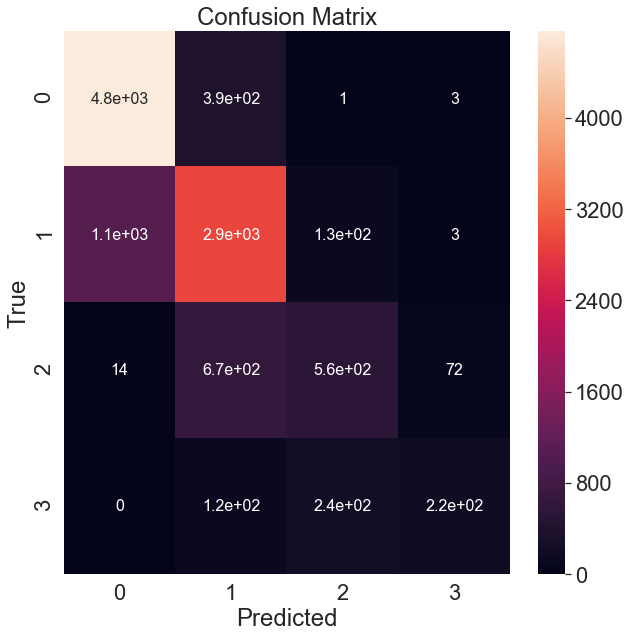

In [123]:
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
sns.heatmap(cm,annot=True,annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True');

Below show the classification metrics and how well each class is performing.

In [97]:
print(classification_report(y_test_no_features, log_muli_class.predict(X_test_no_features_sc), target_names=['one_star','2_star','3_star','4_star']))

              precision    recall  f1-score   support

    one_star       0.81      0.92      0.87      5153
      2_star       0.71      0.71      0.71      4130
      3_star       0.60      0.42      0.50      1310
      4_star       0.74      0.38      0.50       579

   micro avg       0.76      0.76      0.76     11172
   macro avg       0.72      0.61      0.64     11172
weighted avg       0.75      0.76      0.75     11172



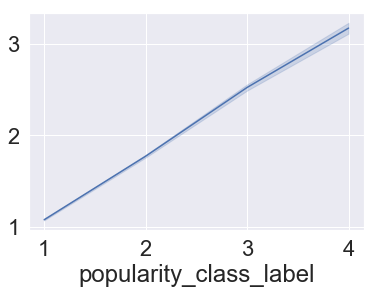

In [125]:
sns.lineplot(x=y_test_no_features,y=log_muli_class.predict(X_test_no_features_sc));

The below dataframe shows the coefficients for the logisitic classfication.

In [158]:
class_coefs=pd.DataFrame(np.exp(log_muli_class.coef_),columns=X_no_features.columns,index=[1,2,3,4]).T
class_coefs.sort_values(by=4)

,1,2,3,4
is_foreign,1.694913e+00,1.566753,0.831926,4.526548e-01
number_of_D_list_cast_members_per_movie,1.283587e+00,0.933264,1.101593,7.577906e-01
original_title_postive_sentiment_score,9.605816e-01,0.998168,1.342050,7.771292e-01
video,1.103587e+00,1.078716,1.066238,7.878292e-01
original_title_neutral_sentiment_score,8.021299e-01,0.861886,1.820885,7.943702e-01
...,...,...,...,...
vote_average,6.632879e-01,0.863108,1.201948,1.453272e+00
release_year,5.532521e-01,0.881173,1.367538,1.499949e+00
has_overview,1.077367e+00,0.583303,1.059591,1.501772e+00
total_cast_per_movie,5.939920e-01,1.192317,0.805939,1.751965e+00
